#### Anscombe's Quartet
Sometimes summary statistics like the mean and standard deviation can be great for attempting to qucikly understand aspects of a dataset, but they can also be misleading if you make too many assumptions about how the data distribution looks.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
Anscombe = pd.read_csv("Anscombe's Quartet.csv")
Anscombe.head()

,X,Y,A,B,C,D,E,F
0,10,8.04,10,9.14,10,7.46,8,6.58
1,8,6.95,8,8.14,8,6.77,8,5.76
2,13,7.58,13,8.74,13,12.74,8,7.71
3,9,8.81,9,8.77,9,7.11,8,8.84
4,11,8.33,11,9.26,11,7.81,8,8.47


In [4]:
Anscombe.describe()


,X,Y,A,B,C,D,E,F
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,9.000000,7.500909,9.000000,7.500909,9.000000,7.500000,9.000000,7.500909
std,3.316625,2.031568,3.316625,2.031657,3.316625,2.030424,3.316625,2.030579
min,4.000000,4.260000,4.000000,3.100000,4.000000,5.390000,8.000000,5.250000
25%,6.500000,6.315000,6.500000,6.695000,6.500000,6.250000,8.000000,6.170000
50%,9.000000,7.580000,9.000000,8.140000,9.000000,7.110000,8.000000,7.040000
75%,11.500000,8.570000,11.500000,8.950000,11.500000,7.980000,8.000000,8.190000
max,14.000000,10.840000,14.000000,9.260000,14.000000,12.740000,19.000000,12.500000


The statistic summaries of Anscombe's Quartet are identical. They all share the same mean and standard deviation.

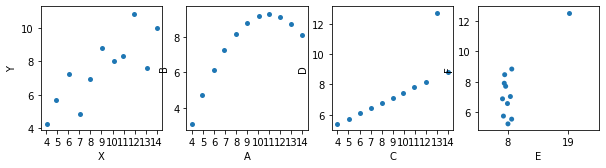

In [5]:
plt.figure(figsize=[10,5])
base_color = sns.color_palette()[0]

plt.subplot(2,4,1)
sns.stripplot(data = Anscombe, x = 'X', y='Y',color = base_color)

plt.subplot(2,4,2)
sns.stripplot(data = Anscombe, x = 'A', y='B',color = base_color)

plt.subplot(2,4,3)
sns.stripplot(data = Anscombe, x = 'C', y='D',color = base_color)

plt.subplot(2,4,4)
sns.stripplot(data = Anscombe, x = 'E', y='F',color = base_color)

Visualization can be used for two main purposes when analyzing data: data Exploratory analysis and explanatory analysis.

#### Data semantics
A dataset is a collection of values, usually either numbers (if quantitative) or strings (if qualitative). Values are organised in two ways. Every value belongs to a variable and an observation. A variable contains all values that measure the same underlying attribute (like height, temperature, duration) across units. An observation contains all values measured on the same unit (like a person, or a day, or a race) across attributes.

#### Tidy data
Tidy data is a standard way of mapping the meaning of a dataset to its structure. A dataset is messy or tidy depending on how rows, columns and tables are matched up with observations, variables and types. In a tidy data:
1.Each varible forms a column.
2.Each observation forms a row.
3.Each type of observational unit forms a table.

#### Tidying messy datasets
Real datasets can, and often do, violate the three precepts of tidy data in almost every way imaginable. 

-Column headers are values, not variable names.
-Multiple variablea are stored in one column.
-Variables are stored in both rows and columns,
-Multiple types of observational units are stored in the same table.
-A single observational unit is stored in mutiple tables.


### Univariable

#### Bar Charts

In [6]:
pokemon = pd.read_csv('pokemon.csv')
print(pokemon.shape)
pokemon.head(5)

(807, 14)


,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


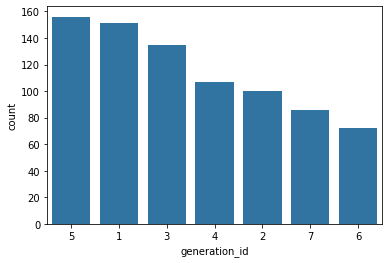

In [9]:
#generate id bar chart
sns.countplot(data=pokemon,x='generation_id',color=base_color,
             order=gen_order);

In [10]:
#check seaborn color palette
sns.color_palette()

#store a basic color in a variable
base_color = sns.color_palette()[0]

In [11]:
#sort the generation_id and store in a variable for x-axis for plot
gen_order = pokemon['generation_id'].value_counts().index

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text xticklabel objects>)

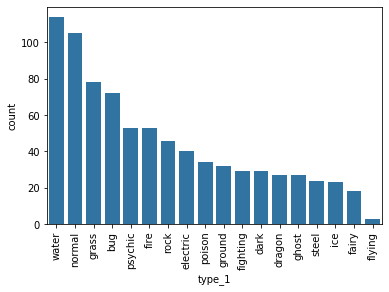

In [15]:
#plot the pokemon type
base_color = sns.color_palette()[0]
sns.countplot(data=pokemon, x='type_1',color=base_color,
             order = type_order );
plt.xticks(rotation =90)

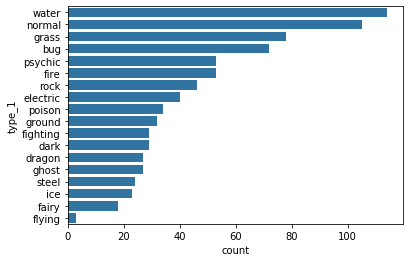

In [16]:
#plot the pokemon type
base_color = sns.color_palette()[0]
sns.countplot(data=pokemon, y='type_1',color=base_color,
             order = type_order );

In [17]:
type_order= pokemon['type_1'].value_counts().index

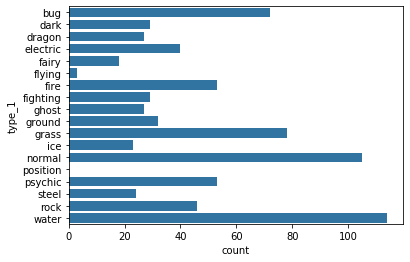

In [18]:

pokemon_copy=pokemon.copy()
type_order2 = ['bug','dark','dragon','electric','fairy','flying','fire','fighting','ghost','ground','grass','ice','normal',
              'position','psychic','steel','rock','water']
ordered_type = pd.api.types.CategoricalDtype(ordered=True, categories = type_order2)
pokemon_copy['type_1']=pokemon_copy['type_1'].astype(ordered_type)

base_color=sns.color_palette()[0]
sns.countplot(data =pokemon_copy, y='type_1',color=base_color)

#### Absolute vs. Relative Frequency

In [19]:
# visualize pokemon type
pkmn_types=pokemon.melt(id_vars = ['id','species'],
                       value_vars=['type_1','type_2'],
                       var_name='type_level',value_name ='type').dropna()
pkmn_types[802:812]

,id,species,type_level,type
802,803,poipole,type_1,poison
803,804,naganadel,type_1,poison
804,805,stakataka,type_1,rock
805,806,blacephalon,type_1,fire
806,807,zeraora,type_1,electric
807,1,bulbasaur,type_2,poison
808,2,ivysaur,type_2,poison
809,3,venusaur,type_2,poison
812,6,charizard,type_2,flying
818,12,butterfree,type_2,flying


In [20]:
type_counts=pkmn_types['type'].value_counts()
type_order3=type_counts.index

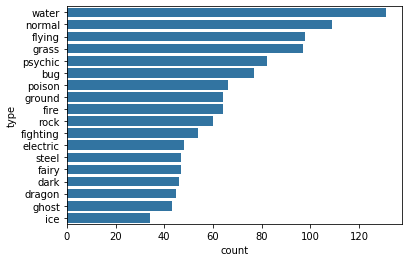

In [21]:
base_color=sns.color_palette()[0]
sns.countplot(data=pkmn_types, y='type',color=base_color, order = type_order3);

In [22]:
n_pokemon = pokemon.shape[0]
max_type_count = type_counts[0]
max_prop = max_type_count / n_pokemon
print(max_prop)

0.1623296158612144


In [23]:
tick_props = np.arange(0, max_prop,0.02)
tick_names = ['{:0.2f}'.format(v)for v in tick_props]

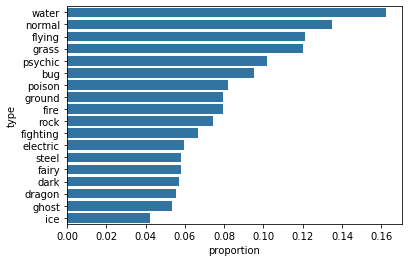

In [24]:
base_color = sns.color_palette()[0]
sns.countplot(data=pkmn_types, y='type',color=base_color, order = type_order3);
plt.xticks(tick_props*n_pokemon,tick_names)
plt.xlabel('proportion');

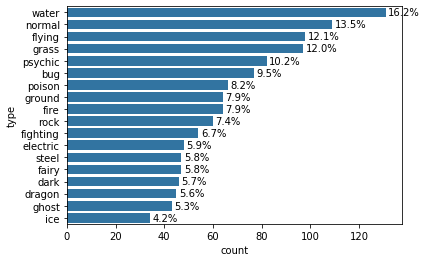

In [25]:
base_color = sns.color_palette()[0]
sns.countplot(data=pkmn_types, y='type',color=base_color, order=type_order3);

for i in range(type_counts.shape[0]):
    count = type_counts[i]
    pct_string ='{:0.1f}%'.format(100*count/n_pokemon)
    plt.text(count+1, i, pct_string,va='center');

#### Counting Missing Data

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

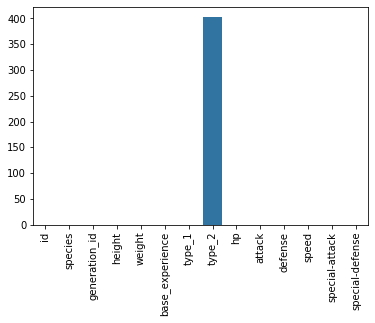

In [32]:
na_counts = pokemon.isna().sum()
base_color = sns.color_palette()[0]
sns.barplot(na_counts.index.values,na_counts, color = base_color)
plt.xticks(rotation=90)

#### Histograms

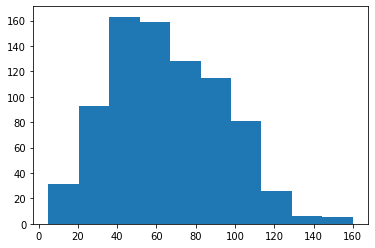

In [33]:
plt.hist(data=pokemon, x='speed');

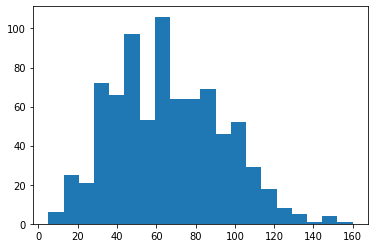

In [35]:
bins =np.arange(0,pokemon['speed'].max()+5, 5)
plt.hist(data=pokemon, x='speed',bins=20);

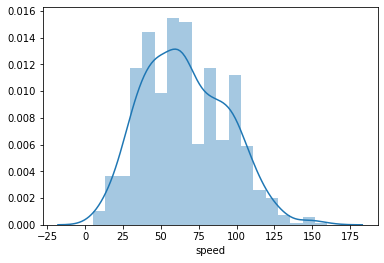

In [37]:
sns.distplot(pokemon['speed']);

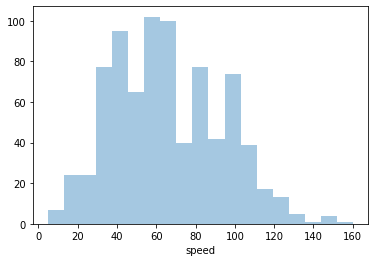

In [38]:
sns.distplot(pokemon['speed'], kde=False);

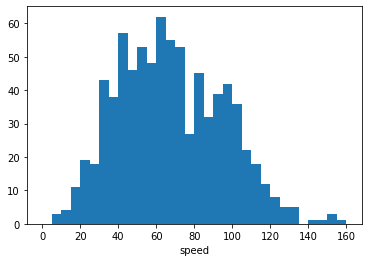

In [39]:
bin_edges =np.arange(0,pokemon['speed'].max()+5,5)
sns.distplot(pokemon['speed'],bins =bin_edges, kde=False,
            hist_kws={'alpha':1})

#### Figures, Axes, and Subplots

(array([ 31.,  93., 163., 159., 128., 115.,  81.,  26.,   6.,   5.]),
 array([  5. ,  20.5,  36. ,  51.5,  67. ,  82.5,  98. , 113.5, 129. ,
        144.5, 160. ]),
 <a list of 10 Patch objects>)

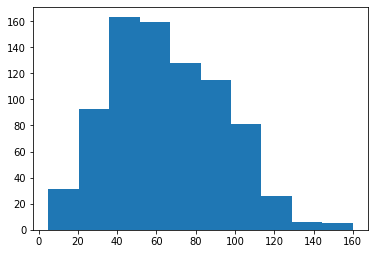

In [40]:
fig=plt.figure()
ax=fig.add_axes([.125,.125,.775,.775])
ax.hist(data=pokemon, x='speed')

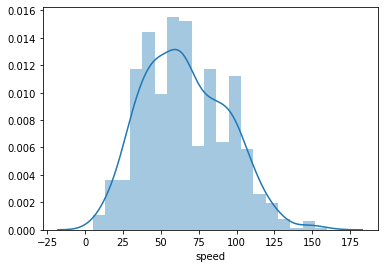

In [43]:
fig=plt.figure()
ax=fig.add_axes([.125,.125,.775,.775])
base_color=sns.color_palette()[0]
sns.distplot(pokemon['speed'],color=base_color, ax=ax)

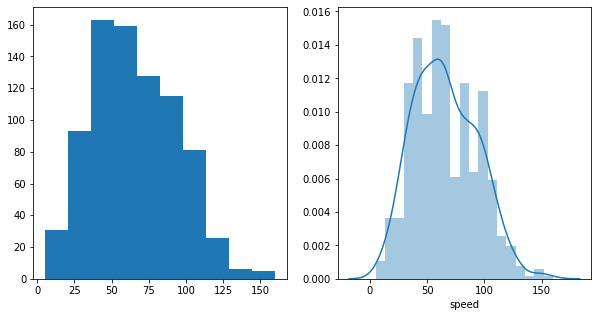

In [44]:
plt.figure(figsize=[10,5])

plt.subplot(1,2,1) #1 row, 2 cols, subplot 1
plt.hist(data=pokemon, x='speed')

plt.subplot(1,2,2)
sns.distplot(pokemon['speed'])

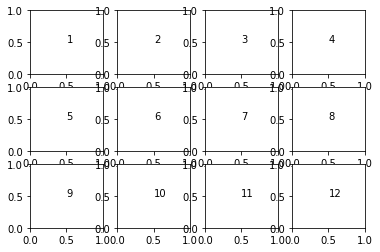

In [46]:
fig, axes = plt.subplots(3,4) # grid of 3x4 subplots
axes = axes.flatten() #reshape from 3x4 array into 12-element vector
for i in range(12):
    plt.sca(axes[i])#set the current Axes
    plt.text(0.5,0.5,i+1)#print conventional subplot index number to middle of axes

#### Choosing a plot for discrete Data

(array([151., 100.,   0., 135.,   0., 107., 156.,   0.,  72.,  86.]),
 array([1. , 1.6, 2.2, 2.8, 3.4, 4. , 4.6, 5.2, 5.8, 6.4, 7. ]),
 <a list of 10 Patch objects>)

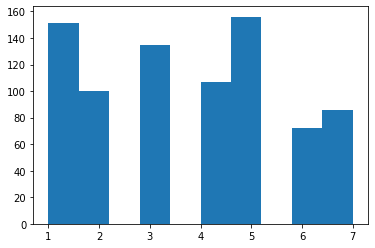

In [54]:
plt.hist(pokemon['generation_id'])

([<matplotlib.axis.XTick at 0x208f0cecf98>,
 <a list of 8 Text xticklabel objects>)

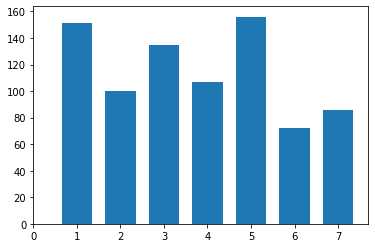

In [53]:
bin_edges = np.arange(0.5, 7+1,1)
plt.hist(data=pokemon, x='generation_id',bins=bin_edges,rwidth=0.7)
plt.xticks(np.arange(0,7+1,1))

#### Descriptive Statistics, Outliers and Axis limits

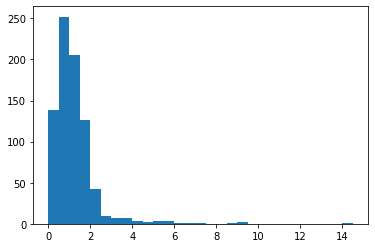

In [58]:
bins =np.arange(0,pokemon['height'].max()+0.5,0.5)
plt.hist(data=pokemon, x='height',bins=bins);


(0, 6)

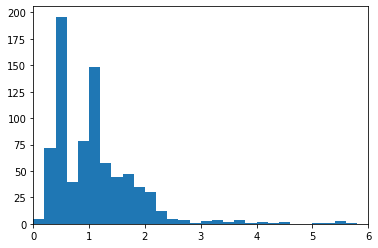

In [59]:
#zoom in some low value area
bins =np.arange(0,pokemon['height'].max()+0.2,0.2)
plt.hist(data=pokemon, x='height',bins=bins);
plt.xlim(0,6)

#### Scales and Transformation

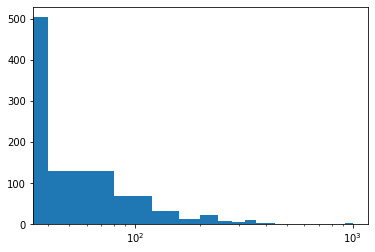

In [64]:
bins=np.arange(0, pokemon['weight'].max()+40,40)
plt.hist(data=pokemon, x='weight',bins=bins);
plt.xscale('log');

In [63]:
np.log10(pokemon['weight'].describe())

count    2.906874
mean     1.790786
std      2.047350
min     -1.000000
25%      0.954243
50%      1.431364
75%      1.799341
max      2.999957
Name: weight, dtype: float64

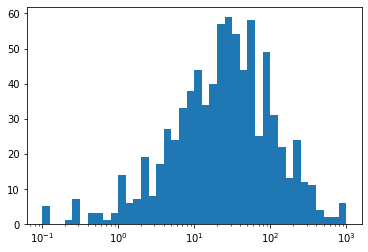

In [65]:
bins=10**np.arange(-1, 3+0.1,0.1)
plt.hist(data=pokemon, x='weight',bins=bins);
plt.xscale('log');

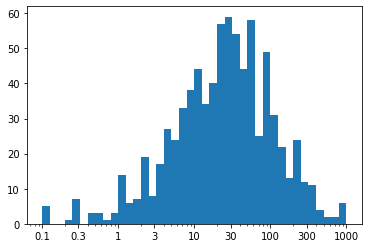

In [68]:
bins=10**np.arange(-1, 3+0.1,0.1)
ticks=[0.1,0.3,1,3,10,30,100,300,1000]
labels=['{}'.format(v)for v in ticks]
plt.hist(data=pokemon, x='weight',bins=bins);
plt.xscale('log');
plt.xticks(ticks,labels);